importing the Dependencies


In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


Data collection and processing


In [238]:
# loading the data from csv file to pandas dataframe
car_dataset= pd.read_csv('/content/car data.csv')

In [239]:
car_dataset.shape

(301, 9)

In [240]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [241]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [242]:
car_dataset.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
239,eon,2012,2.00,4.43,23709,Petrol,Dealer,Manual,0
260,city,2016,9.15,13.60,29223,Petrol,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
268,brio,2017,4.80,5.80,19000,Petrol,Dealer,Manual,0
206,xcent,2017,5.75,7.13,12479,Petrol,Dealer,Manual,0


In [243]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [244]:
#getting information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [245]:
car_dataset['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [246]:
car_dataset['Car_Name']=car_dataset['Car_Name'].str.replace('"','').str.replace('','').str.replace("'",'').astype(str)

In [247]:
car_dataset['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [248]:
car_dataset['Selling_Price'].unique

<bound method Series.unique of 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64>

In [249]:
car_dataset['Seller_Type'].unique

<bound method Series.unique of 0      Dealer
1      Dealer
2      Dealer
3      Dealer
4      Dealer
        ...  
296    Dealer
297    Dealer
298    Dealer
299    Dealer
300    Dealer
Name: Seller_Type, Length: 301, dtype: object>

In [250]:
car_dataset['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [251]:
car_dataset['Kms_Driven'].unique()

array([ 27000,  43000,   6900,   5200,  42450,   2071,  18796,  33429,
        20273,  42367,   2135,  51000,  15000,  26000,  77427,  41678,
        35500,  41442,  25000,   2400,  50000,  45280,  56879,  20000,
        55138,  16200,  44542,  45000,  51439,  54200,  39000,  49998,
        48767, 127000,  10079,  62000,  24524,  46706,  58000,  45780,
        64532,  65000,  25870,  37000, 104707,  40000, 135000,  90000,
        70000,  40534,  39485,  41000,  40001,  40588,  78000,  47000,
         6000,  11000,  59000,  88000,  12000,  71000,  56001,  83000,
        36000,  72000, 135154,  80000,  89000,  23000,  38000, 197176,
       142000,  56000,  58242,  75000,  29000,   8700,  50024,   3000,
         1400,   4000,   1200,   4100,  21700,  16500,  18000,   7000,
        35000,  17000,  17500,  33000,  14000,   5400,   5700,  46500,
        11500,   1300,   5000,   3500,    500,  11800,  23500,  16000,
        16600,  32000,  19000,  24000,  31000,  13000,   8000,   4300,
      

In [252]:
car_dataset['Fuel_Type']=car_dataset['Fuel_Type'].str.replace('','')

In [253]:
car_dataset['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [254]:
car_dataset['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [255]:
car_dataset['Owner'].unique()

array([0, 1, 3])

In [256]:
car_dataset['Seller_Type']=car_dataset['Seller_Type'].str.replace('','')

In [257]:
car_dataset['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [258]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [259]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [260]:
#car_dataset['Kms_Driven']=
car_dataset['Kms_Driven'].unique()

array([ 27000,  43000,   6900,   5200,  42450,   2071,  18796,  33429,
        20273,  42367,   2135,  51000,  15000,  26000,  77427,  41678,
        35500,  41442,  25000,   2400,  50000,  45280,  56879,  20000,
        55138,  16200,  44542,  45000,  51439,  54200,  39000,  49998,
        48767, 127000,  10079,  62000,  24524,  46706,  58000,  45780,
        64532,  65000,  25870,  37000, 104707,  40000, 135000,  90000,
        70000,  40534,  39485,  41000,  40001,  40588,  78000,  47000,
         6000,  11000,  59000,  88000,  12000,  71000,  56001,  83000,
        36000,  72000, 135154,  80000,  89000,  23000,  38000, 197176,
       142000,  56000,  58242,  75000,  29000,   8700,  50024,   3000,
         1400,   4000,   1200,   4100,  21700,  16500,  18000,   7000,
        35000,  17000,  17500,  33000,  14000,   5400,   5700,  46500,
        11500,   1300,   5000,   3500,    500,  11800,  23500,  16000,
        16600,  32000,  19000,  24000,  31000,  13000,   8000,   4300,
      

In [261]:
car_dataset['Kms_Driven']=car_dataset['Kms_Driven'].astype(int)

In [262]:
car_dataset['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [263]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### matplotlib

<Axes: >

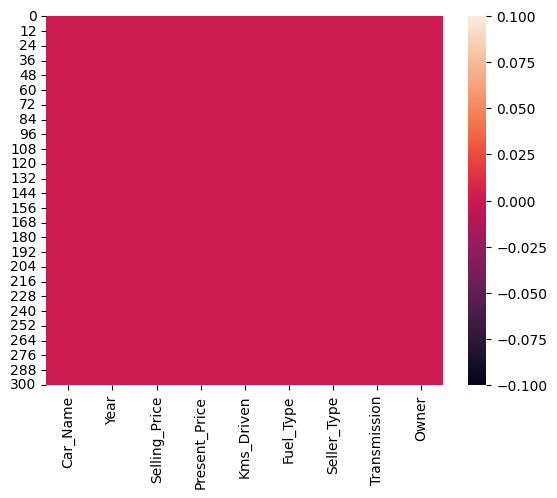

In [264]:
sns.heatmap(car_dataset.isnull())

In [265]:
cat_var=[]
num_var=[]
for i in car_dataset.columns:
    if car_dataset[i].dtype=="object":
        cat_var.append(i)
    else:
        num_var.append(i)

In [266]:
num_var,cat_var

(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'],
 ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'])

<Axes: >

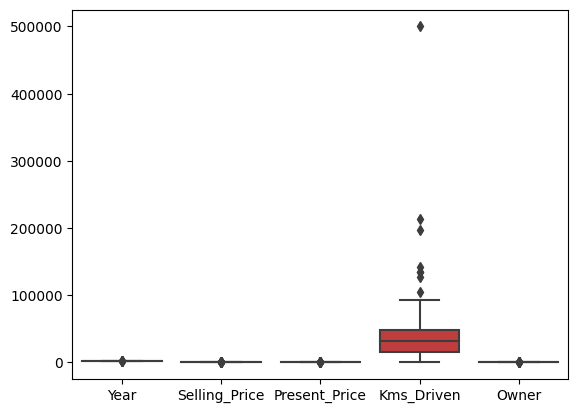

In [267]:
sns.boxplot(car_dataset[num_var])

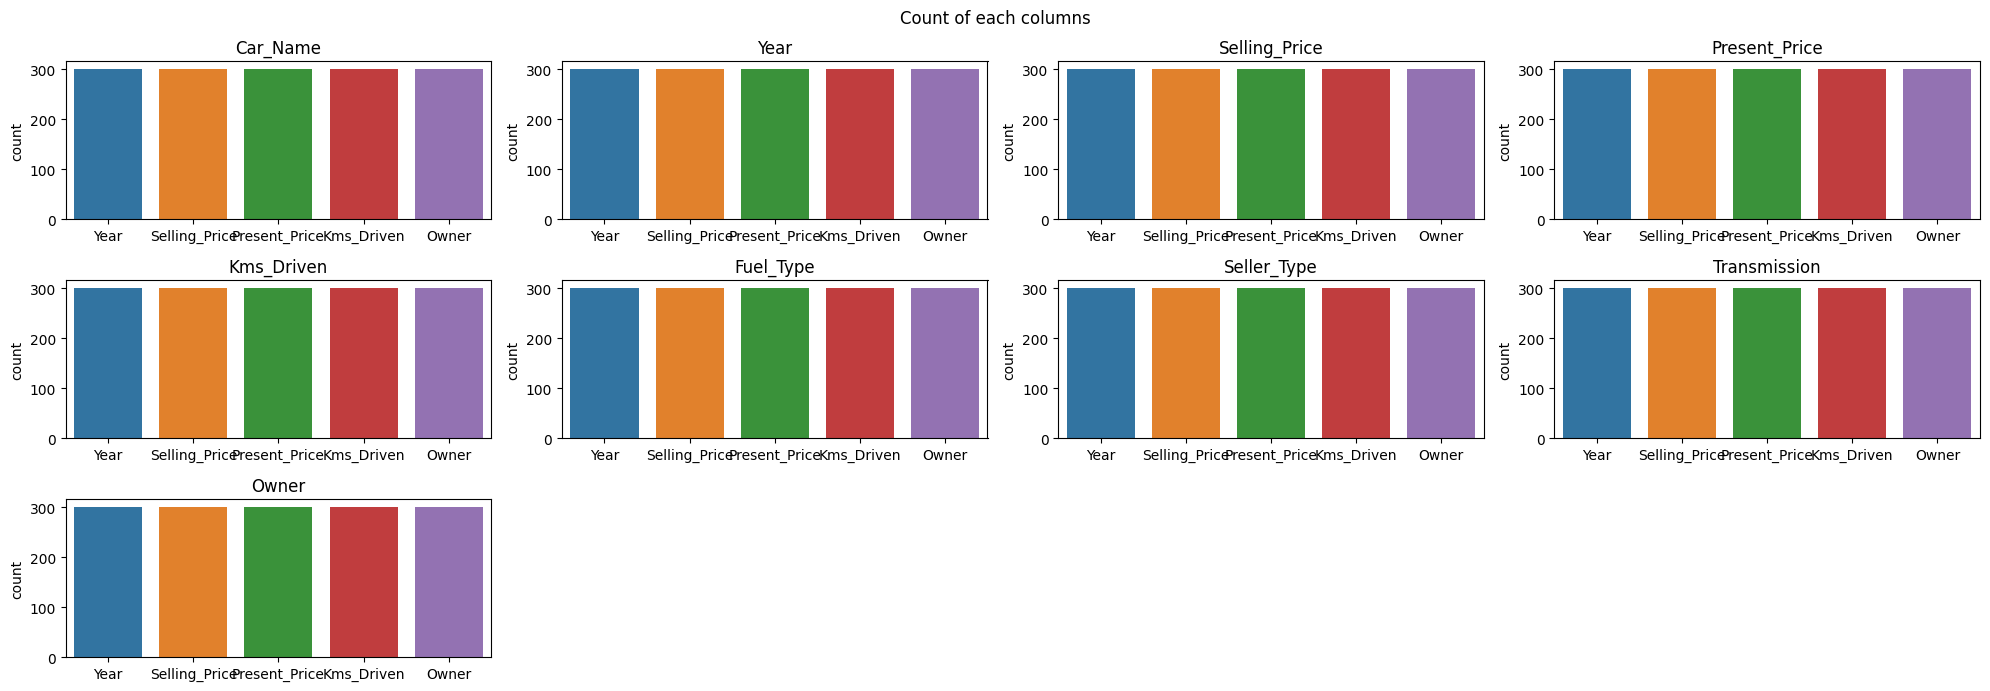

In [268]:
plt.figure(figsize=(20,9))

for i,v in enumerate(car_dataset):
    plt.subplot(4,4,i+1)
    sns.countplot(car_dataset)
    plt.title(v)

plt.suptitle("Count of each columns")
plt.tight_layout()
plt.show()

In [269]:
X=car_dataset.drop(columns='Selling_Price')
y=car_dataset['Selling_Price']

In [270]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [271]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((180, 8), (121, 8), (180,), (121,))

In [272]:
X_train.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
256,city,2016,13.60,49562,Petrol,Dealer,Manual,0
126,Bajaj Avenger 220,2017,0.95,1300,Petrol,Individual,Manual,0
139,Bajaj Avenger 220 dtsi,2015,0.95,16600,Petrol,Individual,Manual,0
208,i20,2017,8.10,3435,Petrol,Dealer,Manual,0
55,corolla altis,2009,15.04,70000,Petrol,Dealer,Automatic,0


In [273]:
from sklearn.preprocessing import OneHotEncoder

In [274]:
from sklearn.linear_model import LogisticRegression

In [275]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [276]:
onh=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
stc=StandardScaler()

In [277]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 256 to 102
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       180 non-null    object 
 1   Year           180 non-null    int64  
 2   Present_Price  180 non-null    float64
 3   Kms_Driven     180 non-null    int64  
 4   Fuel_Type      180 non-null    object 
 5   Seller_Type    180 non-null    object 
 6   Transmission   180 non-null    object 
 7   Owner          180 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 12.7+ KB


In [278]:
tf1=ColumnTransformer(transformers=[
    ('onh',onh,[0,4,5,6])
],remainder='passthrough')

In [279]:
tf2=ColumnTransformer(transformers=[
    ('stc',stc,slice(0,None))
],remainder='passthrough')

In [280]:
car_dataset.shape

(301, 9)

In [281]:
pipe_lgs=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('linear regression',LinearRegression())
])

In [282]:
pipe_lgs.fit(X_train, y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4, 5, 6])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('linear regression', LinearRegression())])

In [283]:
X_train

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
256,city,2016,13.60,49562,Petrol,Dealer,Manual,0
126,Bajaj Avenger 220,2017,0.95,1300,Petrol,Individual,Manual,0
139,Bajaj Avenger 220 dtsi,2015,0.95,16600,Petrol,Individual,Manual,0
208,i20,2017,8.10,3435,Petrol,Dealer,Manual,0
55,corolla altis,2009,15.04,70000,Petrol,Dealer,Automatic,0
...,...,...,...,...,...,...,...,...
188,Hero Glamour,2013,0.57,18000,Petrol,Individual,Manual,0
71,corolla altis,2011,12.48,45000,Diesel,Dealer,Manual,0
106,Hyosung GT250R,2014,3.45,16500,Petrol,Individual,Manual,1
270,city,2011,10.00,69341,Petrol,Dealer,Manual,0


In [284]:
y_pred_lgr=pipe_lgs.predict(X_test)

In [285]:
y_pred_lgr

array([-2.52734289e+11,  1.01323943e+01,  5.78939164e+00, -5.53186037e-01,
        8.38167918e+00,  6.75918044e+00,  1.64229511e+00, -2.52734289e+11,
        7.35543312e-01,  7.50605268e+00, -2.52734289e+11,  6.72842923e-01,
        8.55517532e+00, -2.52734289e+11,  6.76299454e+00,  9.95695902e-01,
       -2.52734289e+11,  1.10747755e+01, -2.52734289e+11, -2.52734289e+11,
       -2.52734289e+11,  8.66428456e+00,  6.96601183e+00,  2.86001347e+00,
       -2.52734289e+11,  3.75673598e+00,  4.99323774e+00,  2.19674745e+00,
        2.95183550e+00,  2.19640453e+00,  1.76398764e-01,  8.85930367e+00,
       -1.52007316e+00,  1.62897519e+00,  8.75944990e+00,  4.04004071e+00,
        4.69845735e+00,  6.10150841e+00,  2.69991606e+00,  6.90644735e+00,
        5.65231861e+00, -2.52734289e+11,  4.36557416e+00, -6.63340151e-01,
       -2.52734289e+11, -6.23994523e-02,  8.22100466e+00,  8.66547106e+00,
        4.07938527e+00,  4.40343708e+00,  6.26095589e+00,  3.24516159e+00,
        2.38436317e+01,  

In [286]:
car_dataset.sample()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
33,ertiga,2014,6.0,9.95,45000,Diesel,Dealer,Manual,0


In [287]:
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('DecisionTree regression',DecisionTreeRegressor())
])

In [288]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4, 5, 6])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('DecisionTree regression', DecisionTreeRegressor())])

In [289]:
y_pred_dtc=pipe_dtc.predict(X_test)

In [290]:
pipe_svr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('SVR',SVR())
])

In [291]:
pipe_svr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4, 5, 6])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('SVR', SVR())])

In [292]:
y_pred_svr=pipe_svr.predict(X_test)

In [293]:
r2_score(y_test,y_pred_svr)

0.3020471499429692

In [294]:
mean_absolute_error(y_test,y_pred_svr)

2.467538949665479

In [295]:
mean_squared_error(y_test,y_pred_svr)

24.05513071342856

In [296]:
pipe_knr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('KNeighborsRegressor',KNeighborsRegressor())
])

In [297]:
pipe_knr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4, 5, 6])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('KNeighborsRegressor', KNeighborsRegressor())])

In [298]:
y_pred_knr=pipe_knr.predict(X_test)

In [299]:
r2_score(y_test,y_pred_knr)

0.4229449335169686

In [300]:
mean_absolute_error(y_test,y_pred_knr)

3.5162975206611566

In [301]:
mean_squared_error(y_test,y_pred_knr)

19.88835642975207

In [302]:
pipe_rfr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('RandomForestRegressor',RandomForestRegressor())
])

In [303]:
pipe_rfr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4, 5, 6])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('RandomForestRegressor', RandomForestRegressor())])

In [304]:
y_pred_rfr=pipe_rfr.predict(X_test)

In [305]:
y_pred_rfr

array([ 0.4624,  9.7108,  5.066 ,  0.2148,  7.1609,  6.8495,  1.1057,
        0.5691,  0.4628,  6.5175,  7.9246,  1.0501,  8.5727,  0.4751,
        5.429 ,  2.8705,  1.1426, 11.3273,  0.4725,  1.5706,  0.2854,
        7.6972,  4.8785,  3.0365,  0.5131,  3.73  ,  5.3695,  3.2575,
        1.1343,  1.1904,  0.5138,  9.048 ,  0.4131,  2.6415,  7.6972,
        4.0215,  6.5061,  5.5113,  2.812 ,  6.1383,  6.2255,  4.284 ,
        4.7545,  0.5309,  6.15  ,  0.7224,  8.0595,  5.295 ,  3.1035,
        3.7245,  5.055 ,  1.4658, 21.8398, 15.9404,  6.3355, 10.6827,
        4.994 ,  9.0684,  2.7625,  6.532 ,  0.2157,  0.2099,  0.8183,
        0.3955,  4.4265,  1.1345, 20.8413, 20.9483,  6.7585,  0.4591,
        3.597 ,  3.65  ,  5.7879,  4.6215,  2.9325,  1.0879,  0.7343,
       11.3552,  0.4019,  8.8804,  5.248 ,  3.473 ,  7.588 , 12.9872,
        2.8325,  0.456 ,  1.184 ,  3.133 ,  0.4649, 16.823 ,  1.1127,
        0.2475,  7.0511,  7.6972,  2.744 ,  0.1786,  4.109 ,  5.6788,
        4.7525,  1.2

In [306]:
r2_score(y_test,y_pred_rfr)

0.8640583702139981

In [307]:
mean_absolute_error(y_test,y_pred_rfr)

0.8680198347107438

In [308]:
mean_squared_error(y_test,y_pred_rfr)

4.68526444677686